## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
* Цель проекта: изучение рынка российского кинопроката и выявление текущих трендов; выявление фильмов, получивших государственную поддержку; определение, насколько такие фильмы интересны зрителю.

**Описание данных**

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

*Cтолбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.*

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd # подключим библиотеку pandas
data_one = pd.read_csv('/datasets/mkrf_movies.csv', sep = ',') # сохраним таблицу в переменную data_one
display(data_one.head(5)) # выведем первые пять строк на экран для ознакомления
data_one.info() # ознакомимсся с общей информацией о данных

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [2]:
data_two = pd.read_csv('/datasets/mkrf_shows.csv', sep = ',') # сохраним таблицу в переменную data_two
display(data_two.head(5)) # выведем первые пять строк на экран для ознакомления
data_two.info() # ознакомимсся с общей информацией о данных

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Вывод:**
* данные в `mkrf_movies` содержат 7486 строк, а в `mkrf_shows` - 3158 строк. В `mkrf_movies` необходимо изменить тип данных в столбце `['puNumber']` с object на int64, в `['ratings']` - на float64, в `['show_start_date']` - на datetime

**Прежде чем объединить в один датафрейм эти две таблицы, проверим сразу типы данных и, по необходимости, преобразуем их**

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [3]:
data_one.loc[data_one['puNumber']=='нет', 'puNumber']='0' # значения "нет" в столбце заменим на 0
data_one['puNumber'] = pd.to_numeric(data_one['puNumber']) # изменим тип данных на int64
data_one['ratings'] = pd.to_numeric(data_one['ratings'], errors='coerce') # изменим тип данных на float64
data_one['show_start_date'] = pd.to_datetime(data_one['show_start_date'], format = '%Y-%m-%d') 
# изменим тип данных на datetime64
data_one.info() # убедимся, что все типы данных изменены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [4]:
# после преобразования типов данных объединим данные из двух файлов
data = data_one.merge(data_two, on='puNumber', how='left') 
display(data.head(10)) # выведем первые 10 строк 
data.info() # убедимся, что таблицы объединены, и данные не утеряны

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Вывод:**
* данные в датафрейме преобразовали в необходимый формат: `['puNumber']` на int64, в `['ratings']` - на float64, в `['show_start_date']` - на datetime, таблицы объединили без потерь данных

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [5]:
display(data.isna().sum()) # находим сумму значений NaN по каждому столбцу

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [6]:
display(data.loc[data.loc[:,'production_country'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [7]:
# пропуски в данном столбце можно заменить на значение "Россия"
data.loc[data['production_country'].isna() == True, 'production_country'] = 'Россия'

**Вывод:**
* столбец `['film_studio']` содержит 18 пропущенных значений (по каждому пропуску можно найти информацию в интернете и заполнить вручную, но это займет длительное время, что нецелесообразно); 
* столбец `['production_country']` содержит 2 пропущенных значения (заменили на значение "Россия"); 
* столбец `['director']` содержит 9 пропущенных значений (по каждому пропуску можно найти информацию в интернете и заполнить вручную, но это займет длительное время, что нецелесообразно);
* столбец `['producer']` содержит 568 пропущенных значений (оставим как есть);
* столбцы `['refundable_support']`, `['nonrefundable_support']`, `['budget']`, `['financing_source']` содержат 7154 пропущенных значения (столбцы заполнены только для фильмов с государственной поддержкой);
* столбец `['ratings']` содержит 996 пропущенных значения (оставим как есть);
* столбец `['genres']` содержит 976 пропущенных значения (оставим как есть);
* столбец `['box_office']` содержит 4328 пропущенных значения (столбцы заполнены только для фильмов из российского кинопроката);

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [8]:
data.duplicated().sum() # найдем сумму дубликатов в таблице по строкам

0

**Вывод: явных дублей в данных не обнаружено**

In [9]:
display(data.loc[data.loc[:,'title'].duplicated(keep=False)]) # выведем фильмы, дублирующиеся по названиям
display(data.loc[data.loc[:,'title'] == 'Особо опасен']) # выведем срез таблицы по названию фильма "Особо опасен" 
print(data.loc[data.loc[:,'title'].duplicated(keep=False)] ['title'].value_counts().count()) 
# найдем число фильмов, имеющих дублирующие названия

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


558


**Вывод:**
* в таблице имееются фильмы с одними и теми же данными, но с разными номерами прокатных удостоверений (удалять дублирующие значения не будем, так как, скорее всего, фильмы выходили в прокат несколько раз)

In [10]:
display(data.loc[data.loc[:,'puNumber'].duplicated(keep=False)]) 
# выведем фильмы, дублирующиеся по номерам прокатных удостоверений

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


**Вывод:**
* имеются строки, где номера прокатных удостоверений имеют одинаковые значения, но фильмы при этом под ними записаны разные (возможно, одно прокатное удостоверение выдавалось на несколько фильмов сразу), имеются строки, содержащие одни и те же номера прокатных удостоверений, но при этом страна-производитель, режиссер, продюсер, возрастная категория, рейтинг - разные (возможно, это две версии одного фильма(для старшей и младшей возрастных категорий, либо можно признать это дублями, заменив на одно, усредненное значение)

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [11]:
display(data['title'].value_counts()) # найдем количество уникальных значений
display(data['title'].unique()) 

День святого Валентина_                            5
Кошки против собак: Месть Китти Галор              4
Дом грёз                                           4
Дорога /По новелле Кормака МкКарфи/                4
Двойной копец                                      4
                                                  ..
Бэтмэн и Робин /По мотивам комиксов Боба Кейна/    1
Закрой глаза                                       1
Содора                                             1
Грязная кампания за честные выборы                 1
Дерево.                                            1
Name: title, Length: 6772, dtype: int64

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [12]:
display(data['film_studio'].value_counts()) # найдем количество уникальных значений
display(data['film_studio'].unique())

Киностудия "Мосфильм"                                                                        341
ООО "Мульт в кино"                                                                            57
Анимаккорд Лтд                                                                                23
ООО "Мульт в кино"                                                                            18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                        16
                                                                                            ... 
Дуэа Фильм, Комво Продуциони, Эр А И Синема, Министеро пер и Бени э ле Аттивита Културали      1
Процесс Медиа, Лав Панч, СНД                                                                   1
Парамаунт Плейз, Волден Медиа, Баа Продакшнс, Медиа Райс Кэпитал, Николодион Мувис             1
Продюссьонс дель Премьер Синкуэна, Жинга Филмз, Нео Арт Энтертейнмент, Сплендер Филмз          1
Марвел Интертейнмент, Сони Пик

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [13]:
display(data['production_country'].value_counts()) # найдем количество уникальных значений
display(data['production_country'].unique())

США                    2172
Россия                 1823
СССР                    347
Франция                 301
Великобритания          257
                       ... 
СССР                      1
Иран, Франция             1
США-Аргентина             1
Франция - Финляндия       1
США - Норвегия            1
Name: production_country, Length: 950, dtype: int64

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [14]:
display(data['director'].value_counts()) # найдем количество уникальных значений
display(data['director'].unique())

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
                    ..
Сидни Люмет          1
Ховард Халл          1
Эндрю Трауки         1
Г.Добрыгин           1
Хезер Ленц           1
Name: director, Length: 4811, dtype: int64

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [15]:
display(data['producer'].value_counts()) # найдем количество уникальных значений
display(data['producer'].unique())

П.Смирнов                                                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                    28
С.Сельянов                                                                       18
Д.Ловейко, О.Кузовков                                                            17
Тони Майерс                                                                      11
                                                                                 ..
А.Учитель, К.Саксаганская, Г.Малков, В.Зеленский, С.Шефир, Б.Шефир, А.Яковлев     1
Тайлер Джексон, Сефтон Финчэм, Джек Хеллер                                        1
Рауф Атамалибеков, Фарид Гумбатов                                                 1
Валькирия Барбоза, Джимена Бланко, Даниэль Бурман                                 1
Крис Брайэм, Нина Воларски, Дэйвид Клоуанс                                        1
Name: producer, Length: 5349, dtype: int64

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [16]:
display(data['age_restriction'].value_counts()) # найдем количество уникальных значений
display(data['age_restriction'].unique())

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [17]:
display(data['genres'].value_counts())
display(data['genres'].unique())

драма                          476
комедия                        352
мелодрама,комедия              222
драма,мелодрама,комедия        189
драма,мелодрама                183
                              ... 
криминал,мелодрама               1
фантастика,драма,ужасы           1
фантастика,триллер,боевик        1
триллер,драма,боевик             1
приключения,история,военный      1
Name: genres, Length: 742, dtype: int64

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [18]:
display(data['financing_source'].value_counts())
display(data['financing_source'].unique())

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [19]:
display(data['type'].value_counts()) # найдем количество уникальных значений
display(data['type'].unique())

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [20]:
data['type'] = data['type'].str.strip() # уберем лишние пробелы
print(data['type'].unique())
display(data['type'].value_counts()) # найдем количество уникальных значений

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

**Вывод:**
* в категориальных столбцах нет единообразия записей, по-разному переведены фамилии и имена режиссеров, продюсеров, нет единообразия написания названий фильмов, стран, снявших фильмы. Также имеются лишние пробелы в указании жанра (были исправлены)

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
8.9      1
9.2      1
1.9      1
9.1      1
1.3      1
Name: ratings, Length: 80, dtype: int64

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

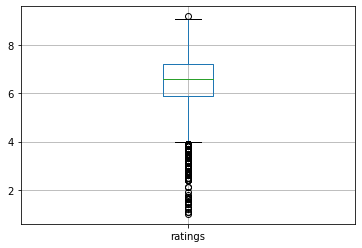

In [21]:
display(data['ratings'].value_counts()) # найдем количество уникальных значений
display(data['ratings'].unique())
import matplotlib.pyplot as plt # подключаем библиотеку matplotlib.pyplot
data_one.boxplot(['ratings']); # Редкие и выбивающиеся значения можно найти с помощью boxplot(),

**Вывод:**
* аномальных значений рейтинга в данных нет

0.0            17
38000000.0      6
80000000.0      4
50000000.0      4
40000000.0      3
               ..
49280496.0      1
56693559.0      1
57166797.0      1
109814241.0     1
42252509.0      1
Name: budget, Length: 290, dtype: int64

0.0            221
20000000.0      12
10000000.0      10
25000000.0      10
15000000.0       9
5000000.0        9
50000000.0       8
40000000.0       8
30000000.0       7
60000000.0       6
100000000.0      5
110000000.0      2
55000000.0       2
19000000.0       2
75000000.0       2
7153119.0        1
35000000.0       1
9000000.0        1
150000000.0      1
36000000.0       1
29000000.0       1
17000000.0       1
180000000.0      1
115000000.0      1
41000000.0       1
26000000.0       1
7000000.0        1
7346881.0        1
3500000.0        1
8000000.0        1
38000000.0       1
44000000.0       1
28000000.0       1
80000000.0       1
Name: refundable_support, dtype: int64

25000000.0     53
30000000.0     48
35000000.0     29
40000000.0     26
20000000.0     19
               ..
31000000.0      1
29000000.0      1
138969465.0     1
3000000.0       1
25900000.0      1
Name: nonrefundable_support, Length: 75, dtype: int64

0.0            24
200.0          13
300.0          12
360.0           9
400.0           8
               ..
9585014.0       1
809638458.6     1
220728.0        1
11332412.0      1
52984377.0      1
Name: box_office, Length: 2938, dtype: int64

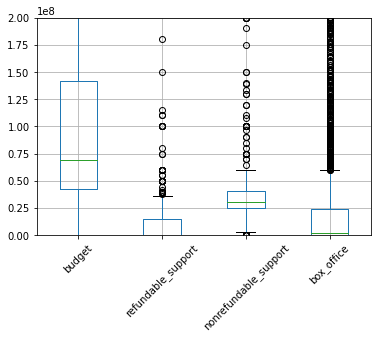

In [22]:
display(data['budget'].value_counts()) # найдем количество уникальных значений
display(data['refundable_support'].value_counts()) 
display(data['nonrefundable_support'].value_counts()) 
display(data['box_office'].value_counts()) 
# Редкие и выбивающиеся значения можно найти с помощью boxplot()
data.boxplot(column = ['budget', 'refundable_support', 'nonrefundable_support','box_office'], rot=45, fontsize=10); 
plt.ylim(0, 200000000)
plt.show()

In [23]:
# выведем список числовых столбцов данных
col = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'ratings'] 
data.describe() # выведем числовые характеристики количественных значений 

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.479245,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.101665,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


In [24]:
data.loc[data['budget'] == 0].describe() # выведем числовые характеристики количественных значений при нулевом бюджете

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,1.700000e+01,1.700000e+01,1.700000e+01,17.0,16.000000,1.700000e+01
mean,1.120672e+08,1.670588e+07,6.517467e+07,0.0,5.725000,1.631373e+08
std,1.473501e+06,2.006478e+07,6.123620e+07,0.0,0.916151,2.511160e+08
min,1.110004e+08,0.000000e+00,0.000000e+00,0.0,4.300000,1.334699e+06
25%,1.110096e+08,0.000000e+00,2.300000e+07,0.0,5.075000,5.045195e+07
50%,1.110173e+08,1.000000e+07,5.100000e+07,0.0,5.700000,7.293778e+07
75%,1.140017e+08,2.000000e+07,7.500000e+07,0.0,6.300000,1.844876e+08
max,1.140065e+08,6.000000e+07,2.500000e+08,0.0,7.800000,1.038321e+09


In [25]:
# выведем строки, где сумма поддержки больше бюджета
data.loc[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']] 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [26]:
# запишем функцию, которая возращает ненулевые значения поддержки при нулевом бюджете в новый правильный столбец значений бюджета
def new_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']
data['budget_right'] = data.apply(new_budget, axis=1)
display(data.head()) # выведем первые строки таблицы
coll = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'ratings', 'budget_right']
display(data[coll].describe()) # выведем числовые характеристики количественных значений
data['budget'] = data['budget_right'] # заменим значения в столбце budget на budget_right
display(data.head()) # выведем первые строки таблицы
del data['budget_right'] # удалим столбец budget_right
display(data.head()) # выведем первые строки таблицы
# посчитаем количество строк, где поддержка больше бюджета фильма
len(data.loc[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]) 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_right
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN


,refundable_support,nonrefundable_support,budget,box_office,ratings,budget_right
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03,6490.000000,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07,6.479245,1.314224e+08
std,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08,1.101665,1.871482e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,6.000000e+06
25%,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04,5.900000,4.552480e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06,6.600000,7.119690e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07,7.200000,1.500000e+08
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09,9.200000,2.305074e+09


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_right
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


0

**Вывод:** 
* в данных имелись строки, где поддержка была больше, чем бюджет фильма. С целью корректировки данных, была написана функция, которая возращает ненулевые значения поддержки при нулевом бюджете в новый правильный столбец значений бюджета.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [27]:
# добавим столбец года
data['year'] = data['show_start_date'].dt.year
display(data.head())
display(data['year'].value_counts()) 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: year, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [28]:
data['director_first'] = data['director'].str.split(",").str[0]
data['genre_first'] = data['genres'].str.split(",").str[0]
data['director_first'] = data['director_first'].str.strip()
data['genre_first'] = data['genre_first'].str.strip()

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [29]:
data['help_to_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
display(data.head())
data.describe()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_first,genre_first,help_to_budget
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year,help_to_budget
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03,7486.000000,332.000000
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.314224e+08,6.479245,7.647870e+07,2014.594176,0.542098
std,3.838218e+07,2.491656e+07,5.998012e+07,1.871482e+08,1.101665,2.403531e+08,3.008452,0.196925
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,0.000000e+00,2010.000000,0.044043
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.552480e+07,5.900000,8.623900e+04,2012.000000,0.384615
50%,1.210155e+08,0.000000e+00,3.000000e+07,7.119690e+07,6.600000,2.327988e+06,2015.000000,0.614038
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.500000e+08,7.200000,2.397967e+07,2017.000000,0.661412
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09,2019.000000,1.000000


**Вывод:**
* 1. Создан новый столбец с годом премьеры (данные по фильмам представлены с 2011 по 2019 год);
* 2. Выделен первый в списке режиссер и жанр, значения добавлены в новые столбцы;
* 3. Посчитана доля государственной поддержки по отношению к бюджету по каждому фильму, а также выведены числовые характеристики значений помощи: медианное значение составило 0,385, а среднее 0,54.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [30]:
# выведем количество фильмов (прокатных удостоверений), содержащихся в базе, по годам 
data_year_all = data.pivot_table(index ='year', values = 'puNumber', aggfunc ='count')
data_year_all.columns = ['all_films'] # переименуем столбцы
# выведем количество фильмов (прокат. уд.), по столбцу сборов в кинотеатрах
data_year_part = data.pivot_table(index = 'year', values = 'box_office', aggfunc = 'count')
data_year_part.columns = ['part_films'] # переименуем столбцы
final_data = data_year_all.join(data_year_part) # объединим сводные таблицы
# найдем процентное соотношение фильмов, показанных в кинотеатрах, к общему количеству, вышедших в прокат
final_data['share_info'] = ((final_data['part_films'] / final_data['all_films'])*100).round(decimals=1) 
display(final_data)

,all_films,part_films,share_info
year,,,
2010,985,105,10.7
2011,622,109,17.5
2012,593,128,21.6
2013,630,184,29.2
2014,807,279,34.6
2015,705,465,66.0
2016,818,526,64.3
2017,505,357,70.7
2018,891,475,53.3


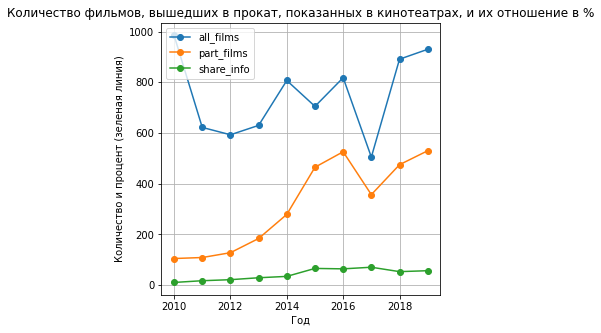

In [31]:
final_data.plot(grid=True, style='o-', figsize=(5, 5))
plt.title("Количество фильмов, вышедших в прокат, показанных в кинотеатрах, и их отношение в %");
plt.xlabel("Год")
plt.ylabel("Количество и процент (зеленая линия)")
plt.show()

**Вывод:**
* Больше всего в данных представлено фильмов, вышедших в 2010 (985), 2019 (930), 2018 (891), 2016 (818) годах, при этом наибольшее количество фильмов показано в кинотеатрах в 2019 (530), 2016 (526) и 2018 (475) годах. Наибольшее соотношение "показанные в кинотеатрах-вышедшие в прокат" составляет 71 % (2017 год)

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [32]:
# выведем сумму сборов, по столбцу сборов в кинотеатрах по годам
data_year_part_money = data.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')
data_year_part_money.columns = ['part_films_money'] # переименуем столбцы
display(data_year_part_money)

,part_films_money
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


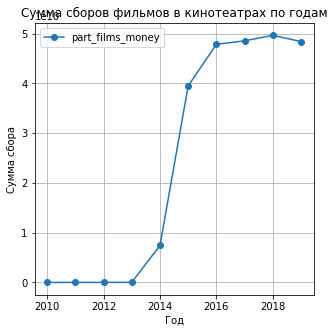

In [33]:
data_year_part_money.plot(grid=True, style='o-', figsize=(5, 5))
plt.title("Сумма сборов фильмов в кинотеатрах по годам");
plt.xlabel("Год")
plt.ylabel("Сумма сбора")
plt.show()

**Вывод:**
* Сумма сборов с 2010 по 2018 год увеличивалась. Наибольший скачок произошел с 2014 по 2016 год. Максимальная сумма сборов была в 2018 году. Минимальная, согласно данным, в 2010. В 2019 году сумма сборов оказалась чуть меньше, чем в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [34]:
# выведем среднюю и медианную сумму сборов, по столбцу сборов в кинотеатрах по годам
data_year_part_money_analis = data.pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean','median'])
data_year_part_money_analis.columns = ['mean', 'median'] # переименуем столбцы
display(data_year_part_money_analis)

,mean,median
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


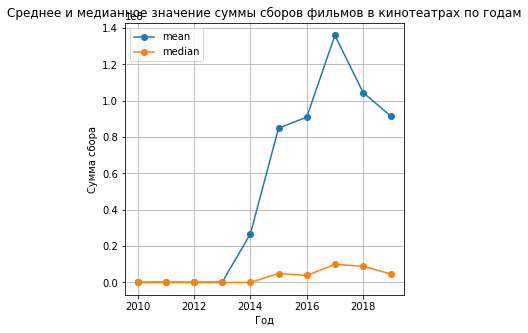

In [35]:
data_year_part_money_analis.plot(grid=True, style='o-', figsize=(5, 5))
plt.title("Среднее и медианное значение суммы сборов фильмов в кинотеатрах по годам");
plt.xlabel("Год")
plt.ylabel("Сумма сбора")
plt.show()

**Вывод:**
* Среднее и медианное значения значительно разнятся с 2013-2019 года, при этом тенденция к увеличению или уменьшению сборов прослеживается на обоих показателях (в 2017 году и то и другое находится в максимальной точке). Значительная разница говорит о том, что сборы по фильмам очень сильно отличаются (имеются как сильно провальные , так и очень успешные фильмы)

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [36]:
data_age = data.query('year > 2014').pivot_table(index='age_restriction', values='box_office', aggfunc = ['count', 'sum','mean', 'median'])
data_age.columns = ['count', 'sum','mean', 'median'] # переименуем столбцы
display(data_age)

,count,sum,mean,median
age_restriction,,,,
«0+» - для любой зрительской аудитории,91,8.090774e+08,8.890961e+06,2943318.70
«12+» - для детей старше 12 лет,348,6.061945e+10,1.741938e+08,5065044.25
«16+» - для детей старше 16 лет,805,7.603473e+10,9.445309e+07,5600007.00
«18+» - запрещено для детей,792,4.075962e+10,5.146416e+07,6154439.17
«6+» - для детей старше 6 лет,317,5.579861e+10,1.760209e+08,13736207.98


In [37]:
data_age1 = data.query('year > 2014').pivot_table(index=['year','age_restriction'], values='box_office', aggfunc = ['count', 'sum','mean', 'median']).reset_index()
data_age1.columns = ['year', 'age_restriction','count', 'sum','mean', 'median'] # переименуем столбцы
display(data_age1)

,year,age_restriction,count,sum,mean,median
0,2015,«0+» - для любой зрительской аудитории,39,3.790546e+08,9.719348e+06,2.943319e+06
1,2015,«12+» - для детей старше 12 лет,73,1.361608e+10,1.865217e+08,1.535156e+07
2,2015,«16+» - для детей старше 16 лет,168,1.136812e+10,6.766739e+07,4.676819e+06
3,2015,«18+» - запрещено для детей,132,5.432308e+09,4.115385e+07,4.616615e+06
4,2015,«6+» - для детей старше 6 лет,53,8.701799e+09,1.641849e+08,2.038098e+07
5,2016,«0+» - для любой зрительской аудитории,41,1.502288e+08,3.664118e+06,2.571294e+06
6,2016,«12+» - для детей старше 12 лет,82,1.220445e+10,1.488347e+08,4.690635e+06
7,2016,«16+» - для детей старше 16 лет,182,1.666455e+10,9.156345e+07,5.133022e+06
8,2016,«18+» - запрещено для детей,151,6.793930e+09,4.499291e+07,6.107002e+06
9,2016,«6+» - для детей старше 6 лет,70,1.205315e+10,1.721878e+08,3.026256e+06


,box_office,year
box_office,1.000000,0.666295
year,0.666295,1.000000


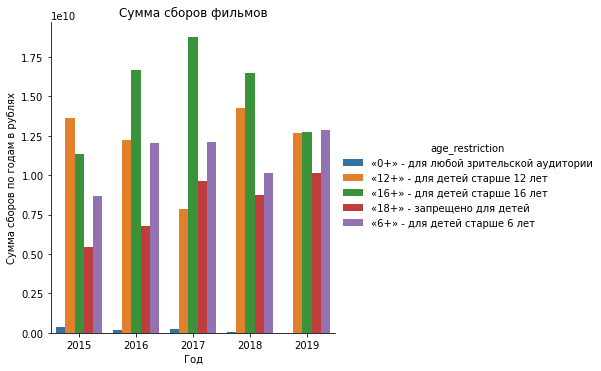

In [38]:
import seaborn as sns
sns.catplot(x='year', y='sum', hue='age_restriction', data=data_age1, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');
display(data.pivot_table(index='age_restriction', values=['year', 'box_office']).corr())

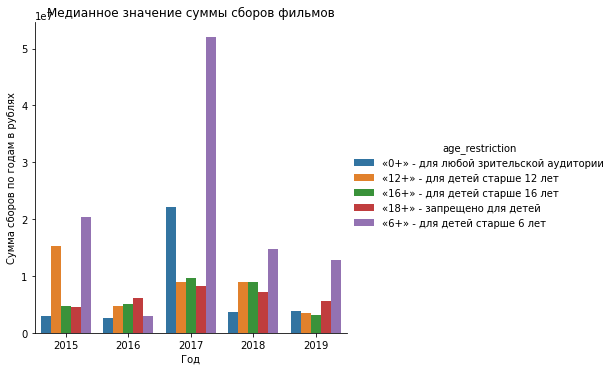

In [39]:
import seaborn as sns
sns.catplot(x='year', y='median', hue='age_restriction', data=data_age1, kind='bar');
plt.title('Медианное значение суммы сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

**Вывод:**
* Больше всего выпускается фильмов для категории 16+, соответственно сумма сборов с 2015 по 2019 год в этой категории самая высокая, при этом среднее и медианное значение выше у сборов фильмов в категории 6+.
* Сбор средств у фильмов категории 16+ увеличивался с 2015 по 2017 год, затем с такой же скоростью начал снижаться, и в 2019 году сравнялся со сборами фильмов категории 12+ и 6+.
* В 2017 году сборы у всех категорий фильмов как общие так и медианные были высоки. Затем начали снижаться.
* Самые высокие медианные значения сборов у фильмов категории 6+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [40]:
# сделаем копию среза данных по ненулевому бюджету
data_budget = data.loc[data['budget'].isna()==False].copy()
# посчитаем сумму господдержки, данные запишем в новый столбец
data_budget['help_total'] = data_budget['refundable_support'] + data_budget['nonrefundable_support']
# посчитаем прибыль от проката фильмов, как разность между сборами и бюджетом
data_budget['profit'] = data_budget['box_office'] - data_budget['budget']
colll = ['help_to_budget', 'help_total', 'profit']
display(data_budget[colll].describe()) # выведем числовые характеристики количественных значений

,help_to_budget,help_total,profit
count,332.000000,3.320000e+02,3.180000e+02
mean,0.542098,6.084545e+07,4.256980e+05
std,0.196925,7.275546e+07,3.159104e+08
min,0.044043,3.000000e+06,-1.971477e+09
25%,0.384615,2.533375e+07,-7.069443e+07
50%,0.614038,3.500000e+07,-4.068082e+07
75%,0.661412,6.000000e+07,-2.362182e+06
max,1.000000,5.000000e+08,2.913569e+09


**Вывод:**
* Среднее значение прибыли от фильмов составляет около 426 тыс, при этом медианное значение отрицательно и составляет 70 694 тыс.
* Средняя доля господдержки составляет 0,54, а медианная 0,61, что говорит о том, что больше половины бюджета - господдержка

In [41]:
data_budget_total = data_budget.pivot_table(index=['year'], values='help_total', aggfunc = ['count', 'sum','mean', 'median']).reset_index()
data_budget_total.columns = ['year', 'count', 'sum','mean', 'median'] # переименуем столбцы
display(data_budget_total)

,year,count,sum,mean,median
0,2013,2,1.343479e+08,6.717397e+07,67173972.5
1,2014,16,5.720023e+08,3.575014e+07,27500000.0
2,2015,86,3.656241e+09,4.251444e+07,30000000.0
3,2016,61,4.303155e+09,7.054353e+07,35000000.0
4,2017,41,3.183972e+09,7.765785e+07,40000000.0
5,2018,56,3.446969e+09,6.155303e+07,45000000.0
6,2019,70,4.904000e+09,7.005714e+07,40000000.0


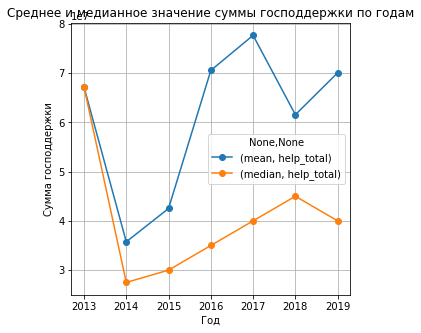

In [42]:
data_budget.pivot_table(index=['year'], values='help_total', aggfunc = ['mean', 'median']).plot(grid=True, style='o-', figsize=(5, 5))
plt.title("Среднее и медианное значение суммы господдержки по годам");
plt.xlabel("Год")
plt.ylabel("Сумма господдержки")
plt.show()

**Вывод:**
* В 2018 году несмотря на то, что среднее значение господдержки снизилось, медианное при этом возросло, что говорит о том что суммы поддержки не сильно разнились между собой

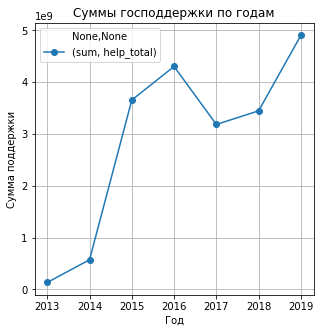

In [43]:
data_budget.pivot_table(index=['year'], values='help_total', aggfunc = ['sum']).plot(grid=True, style='o-', figsize=(5, 5))
plt.title("Суммы господдержки по годам");
plt.xlabel("Год")
plt.ylabel("Сумма поддержки")
plt.show()

**Вывод:**
* Суммы господдержки с каждым годом увеличиваются, это говорит о том, что государство заинтересовано в развитии отрасли кино

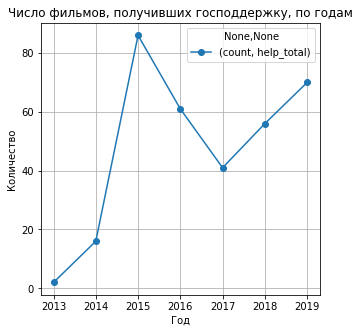

In [44]:
data_budget.pivot_table(index=['year'], values='help_total', aggfunc = ['count']).plot(grid=True, style='o-', figsize=(5, 5))
plt.title("Число фильмов, получивших господдержку, по годам");
plt.xlabel("Год")
plt.ylabel("Количество")
plt.show()

**Вывод:**
* С 2015 по 2017 количество фильмов с господдержкой уменьшалось, а после 2017 снова начало увеличиваться

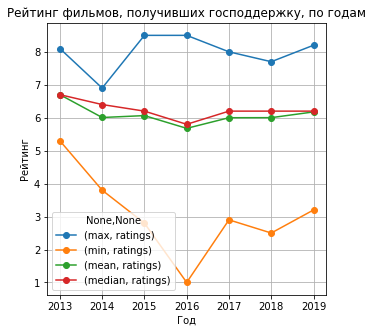

In [45]:
data_budget.pivot_table(index=['year'], values='ratings', aggfunc = ['max', 'min','mean', 'median']).plot(grid=True, style='o-', figsize=(5, 5))
plt.title("Рейтинг фильмов, получивших господдержку, по годам");
plt.xlabel("Год")
plt.ylabel("Рейтинг")
plt.show()

**Вывод:** 
* Самый минимальны рейтинг был у фильмов в 2016 году, о чем также говорит среднее и медианное значение, наибольшее медианное значение рейтинга у фильмов 2013 года.

In [46]:
data_budget_genre = data_budget.pivot_table(index='genre_first', values='help_total', aggfunc = ['count', 'sum','mean', 'median']).reset_index()
data_budget_genre.columns = ['genre_first', 'count', 'sum_t','mean_t', 'median_t'] # переименуем столбцы
data_budget_genre1 = data_budget.pivot_table(index='genre_first', values='profit', aggfunc = ['sum','mean', 'median']).reset_index()
data_budget_genre1.columns = ['genre_first', 'sum_p','mean_p', 'median_p'] # переименуем столбцы
data_budget_genre2 = data_budget.pivot_table(index='genre_first', values='ratings', aggfunc = ['median']).reset_index()
data_budget_genre2.columns = ['genre_first', 'median_r'] # переименуем столбцы
pd.concat([data_budget_genre,data_budget_genre1,data_budget_genre2], axis=1)

,genre_first,count,sum_t,mean_t,median_t,genre_first,sum_p,mean_p,median_p,genre_first,median_r
0,биография,3,1.125100e+08,3.750333e+07,27510000.0,биография,-1.205060e+07,-4.016866e+06,-3.689037e+07,биография,6.90
1,боевик,6,3.340000e+08,5.566667e+07,42500000.0,боевик,-8.750787e+07,-1.458465e+07,-3.373527e+07,боевик,6.45
2,военный,9,4.220009e+08,4.688899e+07,45000000.0,военный,-2.682364e+08,-2.980404e+07,-6.705874e+07,военный,6.40
3,детектив,5,4.850000e+08,9.700000e+07,55000000.0,детектив,-1.059675e+09,-2.119350e+08,-1.215746e+08,детектив,6.80
4,детский,4,1.190000e+08,2.975000e+07,29500000.0,детский,-1.362844e+08,-4.542812e+07,-4.921946e+07,детский,7.25
5,драма,93,5.314407e+09,5.714416e+07,30000000.0,драма,-1.339008e+09,-1.539090e+07,-4.013300e+07,драма,6.40
6,история,4,1.020000e+09,2.550000e+08,240000000.0,история,-6.895940e+08,-1.723985e+08,-2.091613e+08,история,5.90
7,комедия,74,3.218283e+09,4.349031e+07,35000000.0,комедия,6.479538e+09,8.876080e+07,-2.685745e+07,комедия,5.75
8,криминал,3,2.800000e+08,9.333333e+07,40000000.0,криминал,-1.868009e+08,-6.226697e+07,-5.946129e+07,криминал,7.80
9,мелодрама,15,3.980000e+08,2.653333e+07,27500000.0,мелодрама,-8.252164e+08,-5.894403e+07,-5.354880e+07,мелодрама,6.20


**Вывод:**
* Самую большую общую сумму господдержки получили фильмы  жанра "драма" (макс. рейтинг 6.4) , "комедия", "мультфильм", при этом наибольшее медианное значение у фильмов жанра "история", "мультфильм" и "детектив" (макс. рейтинг 6.8).
* Самая большая суммарная прибыль у фильмов жанра "комедия", "спорт" (макс. рейтинг 7) и "фантастика",  при этом наибольшее медианное значение у фильмов жанра "спорт" 
* Наибольший медианный рейтинг у фильмов жанра "криминал" (макс. рейтинг 7.8), "детский", "спорт".

In [55]:
ten_director_ratings = data_budget.pivot_table(index ='director_first', values ='ratings', aggfunc = ['count', 'median'])
ten_director_ratings.columns = ['count', 'median_r'] # переименуем столбцы
display(ten_director_ratings.sort_values('median_r', ascending = False).head(3))
display(ten_director_ratings.sort_values('count', ascending = False).head(3))
ten_director_help_total = data_budget.pivot_table(index ='director_first', values ='help_total', aggfunc = ['sum','median'])
ten_director_help_total.columns = ['sum_t', 'median_t'] # переименуем столбцы
display(ten_director_help_total.sort_values('median_t', ascending = False).head(3))
display(ten_director_help_total.sort_values('sum_t', ascending = False).head(3))
ten_director_profit = data_budget.pivot_table(index ='director_first', values ='profit', aggfunc = ['sum','median'])
ten_director_profit.columns = ['sum_p', 'median_p'] # переименуем столбцы
display(ten_director_profit.sort_values('median_p', ascending = False).head(3))
display(ten_director_profit.sort_values('sum_p', ascending = False).head(3))

,count,median_r
director_first,,
А.Атанесян,1,8.1
А.Попова,1,8.0
К.Оганисян,1,7.9


,count,median_r
director_first,,
Р.Давлетьяров,5,6.30
Д.Дьяченко,4,5.45
С.Андреасян,4,6.75


,sum_t,median_t
director_first,,
А.Кравчук,500000000.0,500000000.0
А.Мизгирев,450000000.0,450000000.0
Н.Лебедев,442104482.0,442104482.0


,sum_t,median_t
director_first,,
Ф.Бондарчук,750000000.0,375000000.0
Н.Хомерики,660000000.0,300000000.0
А.Кравчук,500000000.0,500000000.0


,sum_p,median_p
director_first,,
А.Мегердичев,2.189494e+09,2.189494e+09
А.Сидоров,1.707969e+09,1.707969e+09
О.Трофим,1.297147e+09,1.297147e+09


,sum_p,median_p
director_first,,
К.Шипенко,3.122842e+09,2.589458e+08
А.Мегердичев,2.189494e+09,2.189494e+09
А.Сидоров,1.707969e+09,1.707969e+09


**Вывод:**
* Наибольший рейтинг фильма, получившего господдержку, равен 8.1 (режиссер А.Атанесян), наибольшее количество фильмов (5) с господдержкой снял Р.Давлетьяров (медианный рейтинг 6.3)
* Наибольшее медианное значение суммы господдержки у фильма А.Кравчука, а наибольшая общая сумма господдержки у фильмов Ф.Бондарчука
* Наибольшее медианное значение по прибыли от фильмов А. Мегердичева, а суммарная прибыль выше у фильмов К. Шипенко.

### Шаг 5. Напишите общий вывод

**В ПРОЦЕССЕ РАБОТЫ НАД ПРОЕКТОМ БЫЛИ РЕШЕНЫ СЛЕДУЮЩИЕ ЗАДАЧИ И СДЕЛАНЫ ВЫВОДЫ :**
* 1) **Изучены данные по рынку российского кинопроката**;
* 2) **Проверены и преобразованы типы данных по датафрейму**, а именно: `['puNumber']` на int64, в `['ratings']` - на float64, в `['show_start_date']` - на datetime. Также были объединены таблицы без потери данных.
* 3) **Изучена информация по пропущенным значениям**, заполнили по необходимости пропуски: н-р, столбец `['production_country']` содержит 2 пропущенных значения (заменили на значение "Россия");
* 4) **Изучена информация по дубликатам**: явных дубликатов не обнаружено, но 
*    - в таблице имееются фильмы с одними и теми же данными, но с разными номерами прокатных удостоверений (удалять дублирующие значения не стали, так как, скорее всего, фильмы выходили в прокат несколько раз)
*    - имеются строки, где номера прокатных удостоверений имеют одинаковые значения, но фильмы при этом под ними записаны разные (возможно, одно прокатное удостоверение выдавалось на несколько фильмов сразу), имеются строки, содержащие одни и те же номера прокатных удостоверений, но при этом страна-производитель, режиссер, продюсер, возрастная категория, рейтинг - разные (возможно, это две версии одного фильма(для старшей и младшей возрастных категорий, либо можно признать это дублями, заменив на одно, усредненное значение)
* 5) **Изучена информация по категориальным столбцам**: 
*    - в категориальных столбцах нет единообразия записей, по-разному переведены фамилии и имена режиссеров, продюсеров, нет единообразия написания названий фильмов, стран, снявших фильмы. Также имеются лишние пробелы в указании жанра (были исправлены)
* 6) **Изучена информация по количественным значениям данных**:
*    - в данных имелись строки, где поддержка была больше, чем бюджет фильма. С целью корректировки данных, была написана функция, которая возращает ненулевые значения поддержки при нулевом бюджете в новый правильный столбец значений бюджета
* 7) **Были добавлены новые вспомогательные столбцы**, а именно:
*    - создан новый столбец с годом премьеры (данные по фильмам представлены с 2011 по 2019 год);
*    - выделен первый в списке режиссер и жанр, значения добавлены в новые столбцы;
*    - посчитана доля государственной поддержки по отношению к бюджету по каждому фильму, а также выведены числовые характеристики значений господдержки: медианное значение составило 0,385, а среднее 0,54.
* 8) **Изучены данные о изменении количества фильмов по годам**:
*    - больше всего в данных представлено фильмов, вышедших в 2010 (985), 2019 (930), 2018 (891), 2016 (818) годах, при этом наибольшее количество фильмов показано в кинотеатрах в 2019 (530), 2016 (526) и 2018 (475) годах. Наибольшее соотношение "показанные в кинотеатрах-вышедшие в прокат" составляет 71 % (2017 год)
* 9) **Изучены данные о суммах сборов фильмов в прокате**: 
*    - сумма сборов с 2010 по 2018 год увеличивалась. Наибольший скачок произошел с 2014 по 2016 год. Максимальная сумма сборов была в 2018 году. Минимальная, согласно данным, в 2010. В 2019 году сумма сборов оказалась чуть меньше, чем в 2018 году.
*    - среднее и медианное значения значительно разнятся с 2013-2019 года, при этом тенденция к увеличению или уменьшению сборов прослеживается на обоих показателях (в 2017 году и то и другое находится в максимальной точке). Значительная разница говорит о том, что сборы по фильмам очень сильно отличаются (имеются как сильно провальные , так и очень успешные фильмы) 
* 10) **Изучены данные по сборам и выпуску фильмов в зависимости от возрастной категории фильма**:
*   - больше всего выпускается фильмов для категории 16+, соответственно сумма сборов с 2015 по 2019 год в этой категории самая высокая, при этом среднее и медианное значение выше у сборов фильмов в категории 6+.
*   - сбор средств у фильмов категории 16+ увеличивался с 2015 по 2017 год, затем с такой же скоростью начал снижаться, и в 2019 году сравнялся со сборами фильмов категории 12+ и 6+.
*   - в 2017 году сборы у всех категорий фильмов как общие так и медианные были высоки. Затем начали снижаться.
*   - самые высокие медианные значения сборов у фильмов категории 6+.
* 11) **Изучены данные по значениям прибыли, господдержки, рейтинга фильмов**: 
*   - среднее значение прибыли от фильмов составляет около 426 тыс, при этом медианное значение отрицательно и составляет 70 694 тыс.
*   - средняя доля господдержки составляет 0,54, а медианная 0,61, что говорит о том, что больше половины бюджета – господдержка
*   - в 2018 году несмотря на то, что среднее значение господдержки снизилось, медианное при этом возросло, что говорит о том что суммы поддержки не сильно разнились между собой
*   - суммы господдержки с каждым годом увеличиваются, это говорит о том, что государство заинтересовано в развитии отрасли кино, при этом С 2015 по 2017 количество фильмов с господдержкой уменьшалось, а после 2017 снова начало увеличиваться
*   - самый минимальны рейтинг был у фильмов в 2016 году, о чем также говорит среднее и медианное значение, наибольшее медианное значение рейтинга у фильмов 2013 года.
*   - самую большую общую сумму господдержки получили фильмы  жанра "драма" (макс. рейтинг 6.4) , "комедия", "мультфильм", при этом наибольшее медианное значение у фильмов жанра "история", "мультфильм" и "детектив" (макс. рейтинг 6.8).
*   - самая большая суммарная прибыль у фильмов жанра "комедия", "спорт" (макс. рейтинг 7) и "фантастика",  при этом наибольшее медианное значение у фильмов жанра "спорт" 
*   - наибольший медианный рейтинг у фильмов жанра "криминал" (макс. рейтинг 7.8), "детский", "спорт"
*   - наибольший рейтинг фильма, получившего господдержку, равен 8.1 (режиссер А.Атанесян), наибольшее количество фильмов (5) с господдержкой снял Р.Давлетьяров (медианный рейтинг 6.3)
*   - наибольшее медианное значение суммы господдержки у фильма А.Кравчука, а наибольшая общая сумма господдержки у фильмов Ф.Бондарчука
*   - наибольшее медианное значение по прибыли от фильмов А. Мегердичева, а суммарная прибыль выше у фильмов К. Шипенко.


